In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates



In [2]:
# !pip install pyarrow
# !pip install fastparquet

# Fases del EDA que vamos a realizar:

- Carga Dataset
- Inspección
- Nulos
- Duplicados
- Tipos
- Inconsistencias
- Outliers

In [3]:
df_raw = pd.read_parquet("../data/reservas_hoteles.parquet", engine = 'auto')
df_raw

,id_reserva,id_cliente,nombre,apellido,mail,competencia,fecha_reserva,inicio_estancia,final_estancia,id_hotel,precio_noche,nombre_hotel,estrellas,ciudad
0,5256cc90-139b-43d2-8ec5-412495d751cf,346f2a77-33f4-4b2d-82f3-e8501e21b28d,Feliciana,Cantón,feliciana.cantón@example.com,True,,2025-03-01,2025-03-02,113,NaN,,NaN,
1,84fd6209-bd8d-4a92-bfe6-c68ee2c49271,346f2a77-33f4-4b2d-82f3-e8501e21b28d,Leonardo,Hierro,leonardo.hierro@example.com,True,,2025-03-01,2025-03-02,194,NaN,,NaN,
2,40c4cb55-d1f5-407b-832f-4756b8ff77b4,6ec4d7d2-e382-47cc-94f6-c647577d4035,Maite,Calatayud,maite.calatayud@example.com,False,2025-02-09,2025-03-01,2025-03-02,14,119.96,Hotel Monte Verde,1.0,Madrid
3,f2ce8df5-7844-43e1-8c0f-97ce7a208f21,aed17fe8-eb18-4f69-bf08-df1afdc339c3,Tecla,Bonet,tecla.bonet@example.com,False,2025-02-08,2025-03-01,2025-03-02,38,211.53,Hotel Brisas del Mar,5.0,Madrid
4,57d4515a-447d-4067-afcb-9bdcf4e4e915,710a2fbb-264f-426a-aa66-f8fffd146a2d,Amílcar,Andrés,amílcar.andrés@example.com,False,2025-02-02,2025-03-01,2025-03-02,35,378.37,Hotel Camino del Sol,1.0,Madrid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15093,49c9a352-a260-46fb-9edc-a2c2d05fdfb9,cc50c0c1-a589-44b7-8a41-2c731d033f89,Victoriano,Miralles,victoriano.miralles@example.com,False,2025-02-02,2025-03-01,2025-03-02,36,367.65,Hotel Las Estrellas,3.0,Madrid
15094,f07370e3-feeb-4893-a9ff-4ec4fb518a55,2bf0215f-7f7b-4cfb-9a37-d2022c492410,Anacleto,Toledo,anacleto.toledo@example.com,False,2025-02-07,2025-03-01,2025-03-02,38,144.35,Gran Hotel Madrid,4.0,Madrid
15095,1d4b9293-1733-45ce-8a8e-79d3ac4694eb,4ba34638-c43e-455f-886d-b3e3dd223a07,Máxima,Mayoral,máxima.mayoral@example.com,False,2025-02-08,2025-03-01,2025-03-02,29,463.32,Hotel Jardines del Rey,2.0,Madrid
15096,d6823ca7-e236-48b1-bf68-6b88d9b6534a,a017cb9c-160b-4b90-b4a9-4bdb2dce546a,Rafa,Alcaraz,rafa.alcaraz@example.com,False,2025-02-10,2025-03-01,2025-03-02,15,247.63,Hotel Palacio Imperial,1.0,Madrid


In [4]:
df = df_raw.copy()

In [5]:
df.shape

(15098, 14)

Tenemos:
- 15.098 filas 
- 14 columnas

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15098 entries, 0 to 15097
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id_reserva       15098 non-null  object 
 1   id_cliente       15098 non-null  object 
 2   nombre           15098 non-null  object 
 3   apellido         15098 non-null  object 
 4   mail             15098 non-null  object 
 5   competencia      15098 non-null  bool   
 6   fecha_reserva    15098 non-null  object 
 7   inicio_estancia  15023 non-null  object 
 8   final_estancia   15023 non-null  object 
 9   id_hotel         15098 non-null  int64  
 10  precio_noche     9874 non-null   float64
 11  nombre_hotel     15098 non-null  object 
 12  estrellas        9926 non-null   float64
 13  ciudad           15098 non-null  object 
dtypes: bool(1), float64(2), int64(1), object(10)
memory usage: 1.5+ MB


- Vemos de un primer vistazo que las columnas de las fechas no tienen el formato correcto

In [7]:
df["fecha_reserva"] = pd.to_datetime(df["fecha_reserva"], format="%Y-%m-%d", errors="coerce")
df["inicio_estancia"] = pd.to_datetime(df["inicio_estancia"], format="%Y-%m-%d", errors="coerce")
df["final_estancia"] = pd.to_datetime(df["final_estancia"], format="%Y-%m-%d", errors="coerce")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15098 entries, 0 to 15097
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id_reserva       15098 non-null  object        
 1   id_cliente       15098 non-null  object        
 2   nombre           15098 non-null  object        
 3   apellido         15098 non-null  object        
 4   mail             15098 non-null  object        
 5   competencia      15098 non-null  bool          
 6   fecha_reserva    9926 non-null   datetime64[ns]
 7   inicio_estancia  15023 non-null  datetime64[ns]
 8   final_estancia   15023 non-null  datetime64[ns]
 9   id_hotel         15098 non-null  int64         
 10  precio_noche     9874 non-null   float64       
 11  nombre_hotel     15098 non-null  object        
 12  estrellas        9926 non-null   float64       
 13  ciudad           15098 non-null  object        
dtypes: bool(1), datetime64[ns](3), float64

- fecha_reserva ha pasado de 15098 valores a 9874 --> Había valores que no eran fechas?

In [8]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
fecha_reserva,9926,2025-02-06 10:27:43.993552384,2025-02-01 00:00:00,2025-02-03 00:00:00,2025-02-06 00:00:00,2025-02-09 00:00:00,2025-02-12 00:00:00,NaN
inicio_estancia,15023,2025-02-28 23:59:59.999999744,2025-03-01 00:00:00,2025-03-01 00:00:00,2025-03-01 00:00:00,2025-03-01 00:00:00,2025-03-01 00:00:00,NaN
final_estancia,15023,2025-03-02 00:00:00,2025-03-02 00:00:00,2025-03-02 00:00:00,2025-03-02 00:00:00,2025-03-02 00:00:00,2025-03-02 00:00:00,NaN
id_hotel,15098.0,65.950192,2.0,27.0,40.0,114.0,194.0,57.832033
precio_noche,9874.0,275.11772,50.01,163.12,273.315,387.83,499.82,129.405972
estrellas,9926.0,3.012694,1.0,2.0,3.0,4.0,5.0,1.412446


- La media de las estrellas es de 3.01 (¿Es la valoración de los clientes?)

In [9]:
df.describe(include='object').T

,count,unique,top,freq
id_reserva,15098,15000,601ac12e-ea66-4fcf-bc6d-215806656d1b,2
id_cliente,15098,14847,91cf76ea-170c-459c-82a1-a2dde074ad38,3
nombre,15098,934,Nazaret,41
apellido,15098,1085,Giménez,26
mail,15098,14905,victoriano.ródenas@example.com,3
nombre_hotel,15098,20,,5172
ciudad,15098,2,Madrid,9926


- Al menos un id (601ac12e-ea66-4fcf-bc6d-215806656d1b) se repite 2 veces --> No debería

- 15098 ids de reserva totales VS 15000 ids de reserva únicos --> 98 id_reserva duplicados... No debería haber id_reserva duplicados --> INVESTIGAR

- 15098 ids clientes totales VS 14847 ids clientes únicos --> 251 ids clientes repetidos --> Podríamos pensar que hay 251 reservas duplicadas, pero solo hay 98 <-- TODO: eliminar duplicados

- 15098 nombres totales VS 934 nombres únicos --> 14164 nombres se repiten... --> Concatenar nombre+apellido para verificar... <-- TODO

- 15098 mails totales VS 14095 mails únicos... --> 14095 mails únicos VS 14847 ids clientes únicos --> 752 mails únicos más que ids de clientes únicos ¿Un mismo cliente con diferente mail? --> En principio no debería ser posible, cada usuario debería tener su email único asociado a su cuenta (id cliente)... 
- el mail victoriano.ródenas@example.com se repite las mismas veces que el id_cliente 91cf76ea-170c-459c-82a1-a2dde074ad38 --> Revisar si ese mail tiene asociado el mismo id_cliente <-- TODO

- 15098 fecha_reserva totales VS 13 fecha_reserva únicas --> REVISAR si se concentran por igual en las 13 fechas distintas o se concentran en unas pocas

- 1 inicio_estancia único + 1 final_estancia único --> Todas las estancias son en el mismo periodo de tiempo

- 20 hoteles distintos pero... ¿cuantos id hoteles distintos? Comparar id hotel únicos vs nombre_hotel únicos <-- TODO

- Nos muestran dos ciudades... - En teoría debería ser solo Madrid <-- Verificar si es Madrid escrito de forma diferente

In [10]:
df[df["id_reserva"] == "601ac12e-ea66-4fcf-bc6d-215806656d1b"]

,id_reserva,id_cliente,nombre,apellido,mail,competencia,fecha_reserva,inicio_estancia,final_estancia,id_hotel,precio_noche,nombre_hotel,estrellas,ciudad
6837,601ac12e-ea66-4fcf-bc6d-215806656d1b,696e74a2-8266-4a90-a009-07adcf3e86f7,Selena,Garmendia,selena.garmendia@example.com,False,2025-02-06,2025-03-01,2025-03-02,28,183.21,Hotel Rincón Sereno,5.0,Madrid
15029,601ac12e-ea66-4fcf-bc6d-215806656d1b,696e74a2-8266-4a90-a009-07adcf3e86f7,Selena,Garmendia,selena.garmendia@example.com,False,2025-02-06,2025-03-01,2025-03-02,28,183.21,Hotel Rincón Sereno,5.0,Madrid


- Confirmamos que hay filas repetidas <-- TODO: eliminar duplicados exactos

In [11]:
df[df["id_cliente"] == "91cf76ea-170c-459c-82a1-a2dde074ad38"]

,id_reserva,id_cliente,nombre,apellido,mail,competencia,fecha_reserva,inicio_estancia,final_estancia,id_hotel,precio_noche,nombre_hotel,estrellas,ciudad
3327,9e7b2510-6b4c-4403-87a3-2d107b01ff36,91cf76ea-170c-459c-82a1-a2dde074ad38,Andrés,Blazquez,andrés.blazquez@example.com,False,2025-02-12,2025-03-01,2025-03-02,27,209.81,Hotel Brisas del Mar,3.0,Madrid
3576,44e4e979-32cc-4fc0-94cd-87eac21c9bc8,91cf76ea-170c-459c-82a1-a2dde074ad38,Fabricio,Barreda,fabricio.barreda@example.com,False,2025-02-11,2025-03-01,2025-03-02,13,230.13,Palacio del Sol,3.0,Madrid
15022,44e4e979-32cc-4fc0-94cd-87eac21c9bc8,91cf76ea-170c-459c-82a1-a2dde074ad38,Fabricio,Barreda,fabricio.barreda@example.com,False,2025-02-11,2025-03-01,2025-03-02,13,230.13,Palacio del Sol,3.0,Madrid


In [12]:
df[df["id_cliente"].duplicated(keep=False)].sort_values("id_cliente")

,id_reserva,id_cliente,nombre,apellido,mail,competencia,fecha_reserva,inicio_estancia,final_estancia,id_hotel,precio_noche,nombre_hotel,estrellas,ciudad
15038,fb136ec1-c975-41d5-9c3e-f906c375f935,01fe412b-7e1b-4eb3-a937-b6ece681feaf,Irene,Taboada,irene.taboada@example.com,False,2025-02-02,2025-03-01,2025-03-02,14,222.80,Hotel Jardines del Rey,5.0,Madrid
9453,fb136ec1-c975-41d5-9c3e-f906c375f935,01fe412b-7e1b-4eb3-a937-b6ece681feaf,Irene,Taboada,irene.taboada@example.com,False,2025-02-02,2025-03-01,2025-03-02,14,222.80,Hotel Jardines del Rey,5.0,Madrid
2129,8228a207-4053-4bda-bfa5-2fa0cad1b54c,021189fb-20a8-41c9-9313-90980978ca9e,Jaime,Estevez,jaime.estevez@example.com,True,NaT,2025-03-01,2025-03-02,186,NaN,,NaN,
1155,f34d876b-9c8e-4ca9-b140-439d74e46dff,021189fb-20a8-41c9-9313-90980978ca9e,Andrea,Requena,andrea.requena@example.com,False,2025-02-11,2025-03-01,2025-03-02,15,322.94,Hotel Puerta del Cielo,4.0,Madrid
421,3f9e2e7a-9b2e-4e08-892e-e3d209ac64ba,0356706f-5225-4ac8-ab63-1101fa34ca9c,Alejandra,Querol,alejandra.querol@example.com,False,2025-02-06,2025-03-01,2025-03-02,28,111.91,Hotel Puerta del Cielo,4.0,Madrid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15050,1c683d59-efbe-4a5c-ac66-98f053d4d663,fc190c3e-7475-43ef-803a-dfd7b1c0b1c2,Eduardo,Campo,eduardo.campo@example.com,False,2025-02-03,2025-03-01,2025-03-02,28,473.33,Hotel Palacio Imperial,3.0,Madrid
715,a33c90b3-b9c5-43b2-ae32-fc2e0127f89f,fc80813f-65e8-4ae7-a179-8308c1440cf8,Consuela,Pino,consuela.pino@example.com,False,2025-02-11,2025-03-01,2025-03-02,27,93.92,Hotel Palacio Imperial,3.0,Madrid
1134,66076c28-3a21-4e4d-a115-63fd30027a4f,fc80813f-65e8-4ae7-a179-8308c1440cf8,Leonor,Hurtado,leonor.hurtado@example.com,False,2025-02-12,2025-03-01,2025-03-02,49,158.15,Hotel Costa Azul,1.0,Madrid
15086,50348f31-6c1e-4b70-bbab-40aaf1556cd2,fef36842-2b00-476f-9a99-2ad820891613,Fátima,Maldonado,fátima.maldonado@example.com,False,2025-02-09,2025-03-01,2025-03-02,43,363.63,Hotel Vista Alegre,4.0,Madrid


- Hay id_cliente que están asociados a varias personas!
- Dado que lo único diferente es el mail --> Deberíamos reasignar los id por el mail que son únicos

In [13]:
df["id_reserva"].duplicated().sum()

np.int64(98)

- Confirmamos que hay 98 id_reserva duplicados
- Y que los duplicados parecen, a priori, ser exactos (98x2=196) --> 

In [14]:
df[df["id_reserva"].duplicated(keep=False)].sort_values("id_reserva")

,id_reserva,id_cliente,nombre,apellido,mail,competencia,fecha_reserva,inicio_estancia,final_estancia,id_hotel,precio_noche,nombre_hotel,estrellas,ciudad
12487,01cfdc86-bff5-4d6d-a732-808b98fd5996,0ebc475d-c06b-483d-91bb-41d89ce28119,Mariano,Jimenez,mariano.jimenez@example.com,False,2025-02-05,2025-03-01,2025-03-02,48,262.42,Hotel Los Almendros,3.0,Madrid
15034,01cfdc86-bff5-4d6d-a732-808b98fd5996,0ebc475d-c06b-483d-91bb-41d89ce28119,Mariano,Jimenez,mariano.jimenez@example.com,False,2025-02-05,2025-03-01,2025-03-02,48,262.42,Hotel Los Almendros,3.0,Madrid
6555,029ee4ca-8ddf-49d3-a9b1-22729ebe00e2,91476774-bac9-48cc-acc2-61179f7f7383,Isabel,Lledó,isabel.lledó@example.com,False,2025-02-10,2025-03-01,2025-03-02,19,143.98,Hotel Maravilla Real,2.0,Madrid
15068,029ee4ca-8ddf-49d3-a9b1-22729ebe00e2,91476774-bac9-48cc-acc2-61179f7f7383,Isabel,Lledó,isabel.lledó@example.com,False,2025-02-10,2025-03-01,2025-03-02,19,143.98,Hotel Maravilla Real,2.0,Madrid
15028,07522178-1724-4266-aa22-72167e7b1d11,7237d336-8fa8-4ab3-b454-0d969f0ecb84,Cayetana,Gabaldón,cayetana.gabaldón@example.com,False,2025-02-11,2025-03-01,2025-03-02,6,394.13,Hotel Torre Dorada,1.0,Madrid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15038,fb136ec1-c975-41d5-9c3e-f906c375f935,01fe412b-7e1b-4eb3-a937-b6ece681feaf,Irene,Taboada,irene.taboada@example.com,False,2025-02-02,2025-03-01,2025-03-02,14,222.80,Hotel Jardines del Rey,5.0,Madrid
1982,fbb0b3a9-a00e-46bb-a159-48ba6e13ab01,d56db861-466f-4794-a72f-6f43bec69638,Luna,Salmerón,luna.salmerón@example.com,False,2025-02-04,2025-03-01,2025-03-02,19,422.04,Hotel Puerta del Cielo,2.0,Madrid
15063,fbb0b3a9-a00e-46bb-a159-48ba6e13ab01,d56db861-466f-4794-a72f-6f43bec69638,Luna,Salmerón,luna.salmerón@example.com,False,2025-02-04,2025-03-01,2025-03-02,19,422.04,Hotel Puerta del Cielo,2.0,Madrid
15090,fdd9800c-fd6f-4900-9f8e-c1fa915f518e,d4dfeaa5-b69e-4c5d-953c-eb92943779f9,Demetrio,Chaves,demetrio.chaves@example.com,False,2025-02-01,2025-03-01,2025-03-02,33,86.67,Hotel Vista Alegre,3.0,Madrid


In [15]:
df["nombre_completo"] = df["nombre"] + " " + df["apellido"]
df.describe(include = "object").T

,count,unique,top,freq
id_reserva,15098,15000,601ac12e-ea66-4fcf-bc6d-215806656d1b,2
id_cliente,15098,14847,91cf76ea-170c-459c-82a1-a2dde074ad38,3
nombre,15098,934,Nazaret,41
apellido,15098,1085,Giménez,26
mail,15098,14905,victoriano.ródenas@example.com,3
nombre_hotel,15098,20,,5172
ciudad,15098,2,Madrid,9926
nombre_completo,15098,14905,Victoriano Ródenas,3


- 14847 id_cliente únicos VS 14095 nombres completos únicos --> (752 ids más que nombres únicos) HAY id_clientes QUE ESTÁN ASOCIADOS A MÁS DE UNA PERSONA <-- OJO!!

- 752 id_cliente más que nombres únicos VS 752 mails únicos más que ids de clientes únicos --> "Sobran" 752 ids de clientes respecto a nombres únicos... que son los mismos emails que hay de más que id_cliente --> HAY emails que tienen asociados id_clientes de otras personas... EMPAREJAR cada id-clientes POR MAIL! <-- TODO!! 

- 15098 nombres_completos totales VS 14905 nombres_completos únicos --> 193 nombres_completos repetidos que han podido hacer > de 1 reserva pero... solo hay 98 ids de reserva duplicados lo que no tiene sentido porque tenemos más nombres de clientes repetidos que reservas --> Podría tener sentido si hubiese más ids de reserva duplicados que nombres de personas duplicadas que han reservado: una persona puede reservar con su id_cliente para otra persona no registrada (sin id_cliente) lo cual significaría que cada uno de esos clientes repetidos habría hecho al menos > 1 reserva. 

- VERIFICAR Concatenación nombre + apellido + email


In [16]:
df["nombre_completo_mail"] = df["nombre"] + " " + df["apellido"] + " " + df["mail"]
df.describe(include="object").T

,count,unique,top,freq
id_reserva,15098,15000,601ac12e-ea66-4fcf-bc6d-215806656d1b,2
id_cliente,15098,14847,91cf76ea-170c-459c-82a1-a2dde074ad38,3
nombre,15098,934,Nazaret,41
apellido,15098,1085,Giménez,26
mail,15098,14905,victoriano.ródenas@example.com,3
nombre_hotel,15098,20,,5172
ciudad,15098,2,Madrid,9926
nombre_completo,15098,14905,Victoriano Ródenas,3
nombre_completo_mail,15098,14905,Victoriano Ródenas victoriano.ródenas@example.com,3


- Los nombres completos, los emails y los nombres completos con email coinciden --> Lo que nos indica que cada persona tiene asociado un email (14905 personas distintas) VS 14847 id_clientes únicos --> id_cliente debe estar mal 

In [17]:
df["id_hotel"].duplicated().sum()

np.int64(15069)

- OJO!! id_hotel hay 15069 repetidos VS 20 nombres de hotel únicos --> ¿Se repite mucho un mismo hotel? ¿Estan mal los id?

In [18]:
valores_unicos_nombre_hoteles = df["nombre_hotel"].nunique()
valores_unicos_id_hoteles = df["id_hotel"].nunique()

print(valores_unicos_nombre_hoteles)
print(valores_unicos_id_hoteles)

20
29


- 29 id_hoteles únicos VS 20 nombres de hoteles únicos --> id_hotel repetidos??

In [19]:
df_hoteles_id = df.groupby(["nombre_hotel", "id_hotel"]).count()
df_hoteles_id.tail()

id_reserva  id_cliente  nombre  apellido  mail  \
nombre_hotel    id_hotel                                                   
Palacio del Sol 40                32          32      32        32    32   
                43                22          22      22        22    22   
                47                33          33      33        33    33   
                48                25          25      25        25    25   
                49                28          28      28        28    28   

                          competencia  fecha_reserva  inicio_estancia  \
nombre_hotel    id_hotel                                                
Palacio del Sol 40                 32             32               32   
                43                 22             22               22   
                47                 33             33               33   
                48                 25             25               24   
                49                 28             28               28   

                          final_estancia  precio_noche  estrellas  ciudad  \
nombre_hotel    id_hotel                                                    
Palacio del Sol 40                    32            32         32      32   
                43                    22            22         22      22   
                47                    33            33         33      33   
                48                    24            24         25      25   
                49                    28            28         28      28   

                          nombre_completo  nombre_completo_mail  
nombre_hotel    id_hotel                                         
Palacio del Sol 40                     32                    32  
                43                     22                    22  
                47                     33                    33  
                48                     25                    25  
                49                     28                    28

- Confirmamos que el id_hotel esta mal porque "Palacio del Sol" tiene 5 id distintos...

In [20]:
df[df["id_hotel"].duplicated(keep=False)].sort_values("id_hotel")

,id_reserva,id_cliente,nombre,apellido,mail,competencia,fecha_reserva,inicio_estancia,final_estancia,id_hotel,precio_noche,nombre_hotel,estrellas,ciudad,nombre_completo,nombre_completo_mail
7192,bc9836dc-025a-4f0b-b7dd-c935e8ec09bb,f989798c-b08f-4b0e-a17d-404351a3b072,Luciano,Rey,luciano.rey@example.com,False,2025-02-05,2025-03-01,2025-03-02,2,378.32,Hotel Jardines del Rey,2.0,Madrid,Luciano Rey,Luciano Rey luciano.rey@example.com
11959,010a7a11-d080-426a-a305-47e9d28d2888,11a4c080-9f10-4bff-9aa3-c7eb91e95be7,Sara,Anguita,sara.anguita@example.com,False,2025-02-01,2025-03-01,2025-03-02,2,250.30,Hotel Las Estrellas,3.0,Madrid,Sara Anguita,Sara Anguita sara.anguita@example.com
11944,d5b7a5d8-4c1a-44ce-907e-e37485d6b016,c912fb34-b743-4093-9cf5-c88f0bf1924b,Gilberto,Elías,gilberto.elías@example.com,False,2025-02-02,2025-03-01,2025-03-02,2,105.48,Hotel Camino del Sol,1.0,Madrid,Gilberto Elías,Gilberto Elías gilberto.elías@example.com
12021,82449416-6a44-4f44-a18b-ad56c713d023,c41b06a3-00c1-4a18-83ba-390cf03d7b9c,Clarisa,Ortuño,clarisa.ortuño@example.com,False,2025-02-01,2025-03-01,2025-03-02,2,177.99,Hotel Rincón Sereno,3.0,Madrid,Clarisa Ortuño,Clarisa Ortuño clarisa.ortuño@example.com
10795,aafb6a9c-80f2-4050-ac8e-6369d60d4636,9efae7a6-5cbf-4593-b26a-c4f2eb42bab7,Morena,Gargallo,morena.gargallo@example.com,False,2025-02-03,2025-03-01,2025-03-02,2,246.35,Hotel Jardines del Rey,5.0,Madrid,Morena Gargallo,Morena Gargallo morena.gargallo@example.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6906,019035e6-fd3a-47db-a4df-7676308610de,1036a892-1b65-45c8-a84e-b9900a82612e,Alejandra,Garzón,alejandra.garzón@example.com,True,NaT,2025-03-01,2025-03-02,194,NaN,,NaN,,Alejandra Garzón,Alejandra Garzón alejandra.garzón@example.com
4419,c465c208-0b26-434e-ac91-2af3f8df5285,4f29d189-2e08-4d46-9eca-4bd9782f3035,Maricruz,Puig,maricruz.puig@example.com,True,NaT,2025-03-01,2025-03-02,194,NaN,,NaN,,Maricruz Puig,Maricruz Puig maricruz.puig@example.com
6860,32414a0e-fe16-4661-bfc1-4e656e0b6b3f,da6c9cc1-f84e-42b9-b1e8-5bcbeac5cc3f,Adán,Gibert,adán.gibert@example.com,True,NaT,2025-03-01,2025-03-02,194,NaN,,NaN,,Adán Gibert,Adán Gibert adán.gibert@example.com
6859,696365a6-0ab9-4582-b0f5-4ea732cfa3f0,041e5fbc-f92c-44dd-aa3d-d46e431909ec,Raquel,Crespo,raquel.crespo@example.com,True,NaT,2025-03-01,2025-03-02,194,NaN,,NaN,,Raquel Crespo,Raquel Crespo raquel.crespo@example.com


- Otra forma de verlo: desde aquí ya vemos que el id_hotel 2 está asociado a 5 Hoteles distintos...

In [21]:
print(df["ciudad"].unique())

['' 'Madrid']


- Podemos rellenar la columna ciudad con el valor Madrid

In [22]:
df["ciudad"].value_counts()

ciudad
Madrid    9926
          5172
Name: count, dtype: int64

In [23]:
df["ciudad"].nunique()

2

In [24]:
df["ciudad"] = df["ciudad"].replace("", "Madrid")
df["ciudad"].nunique()

1

- Rellenamos los valores faltrantes de la columna de ciudad

In [25]:
df_hoteles = df["nombre_hotel"].value_counts().reset_index()
df_hoteles

,nombre_hotel,count
0,,5172
1,Hotel Sol y Luna,559
2,Hotel Monte Verde,552
3,Hotel Luz de Madrid,541
4,Hotel Los Almendros,539
5,Hotel Brisas del Mar,538
6,Hotel Mirador Real,536
7,Hotel Puerta del Cielo,531
8,Hotel Camino del Sol,524
9,Gran Hotel Madrid,523


- Hay 5172 reservas a hoteles de los que no tenemos el nombre

In [26]:
df[df["nombre_hotel"] == ""]


,id_reserva,id_cliente,nombre,apellido,mail,competencia,fecha_reserva,inicio_estancia,final_estancia,id_hotel,precio_noche,nombre_hotel,estrellas,ciudad,nombre_completo,nombre_completo_mail
0,5256cc90-139b-43d2-8ec5-412495d751cf,346f2a77-33f4-4b2d-82f3-e8501e21b28d,Feliciana,Cantón,feliciana.cantón@example.com,True,NaT,2025-03-01,2025-03-02,113,NaN,,NaN,Madrid,Feliciana Cantón,Feliciana Cantón feliciana.cantón@example.com
1,84fd6209-bd8d-4a92-bfe6-c68ee2c49271,346f2a77-33f4-4b2d-82f3-e8501e21b28d,Leonardo,Hierro,leonardo.hierro@example.com,True,NaT,2025-03-01,2025-03-02,194,NaN,,NaN,Madrid,Leonardo Hierro,Leonardo Hierro leonardo.hierro@example.com
7,4d65096e-5f12-4ce7-9fd6-dd20e3cf5194,443a7307-2183-4051-b0bb-26f12fc1f478,Judith,Rivas,judith.rivas@example.com,True,NaT,2025-03-01,2025-03-02,131,NaN,,NaN,Madrid,Judith Rivas,Judith Rivas judith.rivas@example.com
9,458029ad-cc9b-4d85-8290-fec170bcc02d,e1a34338-a0aa-4b0e-96de-55f884eeb074,Adolfo,Cuervo,adolfo.cuervo@example.com,True,NaT,2025-03-01,2025-03-02,114,NaN,,NaN,Madrid,Adolfo Cuervo,Adolfo Cuervo adolfo.cuervo@example.com
11,ac0fe86e-90a0-4fe6-a02e-6ea00e9a8621,2949fb90-39ab-4613-b4c1-e238bb56faf3,María Carmen,Navarro,maría carmen.navarro@example.com,True,NaT,2025-03-01,2025-03-02,103,NaN,,NaN,Madrid,María Carmen Navarro,María Carmen Navarro maría carmen.navarro@exam...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14989,e856adee-838c-4031-920c-05ec5f1e32e6,7d248367-3444-4bfd-97b3-c56892fa7d97,Jesusa,Espinosa,jesusa.espinosa@example.com,True,NaT,2025-03-01,2025-03-02,135,NaN,,NaN,Madrid,Jesusa Espinosa,Jesusa Espinosa jesusa.espinosa@example.com
14991,77134049-6e4f-49b0-a6f8-93b7466b1c22,524c7818-3167-4dc6-bbe3-a75bbc32feaf,Cruz,Hurtado,cruz.hurtado@example.com,True,NaT,2025-03-01,2025-03-02,128,NaN,,NaN,Madrid,Cruz Hurtado,Cruz Hurtado cruz.hurtado@example.com
14993,19aef6f3-3e85-4719-9dff-b768d9bfe5a9,fc8320ad-ce4d-4d23-bacd-347b2a2ac24c,Jose Francisco,Cortes,jose francisco.cortes@example.com,True,NaT,2025-03-01,2025-03-02,186,NaN,,NaN,Madrid,Jose Francisco Cortes,Jose Francisco Cortes jose francisco.cortes@ex...
14996,aa092c3e-7fe6-4985-a5a8-cacd38554b1b,8469b819-d96a-4904-9cdd-710764f6301f,Toño,Narváez,toño.narváez@example.com,True,NaT,2025-03-01,2025-03-02,114,NaN,,NaN,Madrid,Toño Narváez,Toño Narváez toño.narváez@example.com


- Parece que esas reservas de hoteles sin nombre son las de los hoteles de la competencia

In [27]:
df[df["nombre_hotel"] == ""].shape[0] == df[df["competencia"] == True].shape[0]

True

- Confirmamos que son los hoteles de la competencia

In [28]:
errores_fechas_estancia = df[df["inicio_estancia"] > df["final_estancia"]]
errores_fechas_estancia.shape


(0, 16)

- No hay inconsistencia en las fechas de estancia. 

In [29]:
errores_reserva_estancia = df[df["fecha_reserva"] > df["inicio_estancia"]]
errores_reserva_estancia.shape

(0, 16)

- No hay inconsistencia en las fechas de reserva

In [30]:
df_reservas = df["fecha_reserva"].value_counts().reset_index()
df_reservas = df_reservas.sort_values(by="fecha_reserva")
df_reservas


,fecha_reserva,count
8,2025-02-01,817
2,2025-02-02,862
3,2025-02-03,840
1,2025-02-04,877
4,2025-02-05,828
0,2025-02-06,883
9,2025-02-07,787
11,2025-02-08,776
5,2025-02-09,826
6,2025-02-10,825


- Las fechas de reserva se concentran de manera uniforme en los primeros 12 días de Febrero

In [31]:
df_reservas_2 = (df["inicio_estancia"] - df["fecha_reserva"]).value_counts().reset_index()
df_reservas_2 = df_reservas_2.sort_values(by="index", ascending=False)
df_reservas_2

,index,count
7,28 days,812
2,27 days,858
3,26 days,833
1,25 days,875
4,24 days,825
0,23 days,880
9,22 days,785
11,21 days,770
5,20 days,822
6,19 days,821


- Todas las reservas se han hecho entre 1 mes (28 días) y 2 semanas (17 días) antes de la estancia

In [32]:
df_inicio_estancia = df["inicio_estancia"].value_counts().reset_index()
df_inicio_estancia


,inicio_estancia,count
0,2025-03-01,15023


- Todas las estancias son de entrada el 01/03

In [33]:
df_final_estancia = df["final_estancia"].value_counts().reset_index()
df_final_estancia

,final_estancia,count
0,2025-03-02,15023


- Todas las salidas son el 02/03

In [34]:
df_estancias = ( df["final_estancia"] - df["inicio_estancia"]).value_counts().reset_index()
df_estancias = df_estancias.sort_values(by="index", ascending=False)
df_estancias

,index,count
0,1 days,15023


- Todas las estancias son de 1 día (o noche)

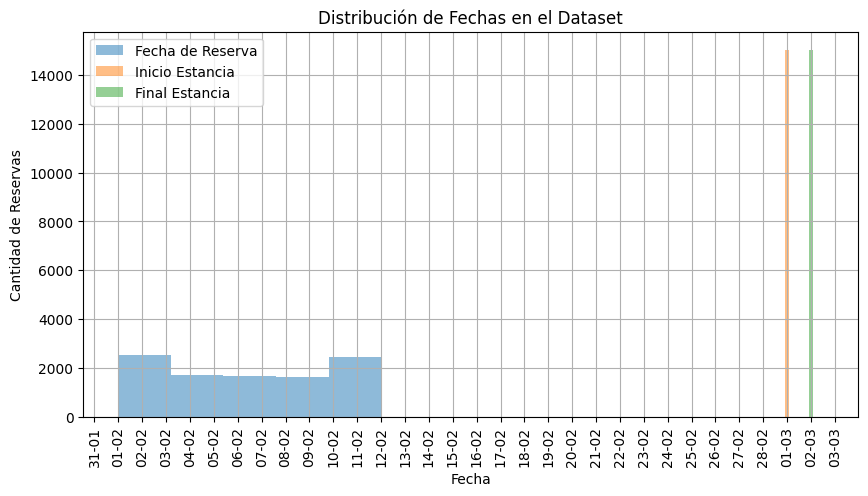

In [35]:

plt.figure(figsize=(10,5))

df["fecha_reserva"].hist(bins=5, alpha=0.5, label="Fecha de Reserva")
df["inicio_estancia"].hist(bins=5, alpha=0.5, label="Inicio Estancia")
df["final_estancia"].hist(bins=5, alpha=0.5, label="Final Estancia")

plt.legend()
plt.xlabel("Fecha")
plt.ylabel("Cantidad de Reservas")
plt.title("Distribución de Fechas en el Dataset")

# Aplicar formato a las fechas
ax = plt.gca()  # Obtener el eje actual
ax.xaxis.set_major_formatter(mdates.DateFormatter("%d-%m"))  
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))  

plt.xticks(rotation=90)  
plt.show()


In [36]:
df["id_cliente"].nunique()

14847

In [37]:
# ngroup asigna un valor empezando en 0 (añadimos +1 para que empiece en 1) a cada grupo generado por el group by
df['id_cliente'] = df.groupby('mail').ngroup() + 1
# 1. agrupamos por email
# 2. asignamos un valor a cada grupo de email
# 3. le sumamos 1 para que empiece en 1
# 4. le asignamos esos valores a la columna de id_cliente
# 4.1 pandas lo replica automáticamente en todas las filas que pertenecen a ese grupo (sin tener que iterar una por una)
df["id_cliente"].nunique()


14905

In [38]:
df_id_cliente = df.groupby(["id_cliente", "mail"]).count()
df_id_cliente

,,id_reserva,nombre,apellido,competencia,fecha_reserva,inicio_estancia,final_estancia,id_hotel,precio_noche,nombre_hotel,estrellas,ciudad,nombre_completo,nombre_completo_mail
id_cliente,mail,,,,,,,,,,,,,,
1,aarón.alemán@example.com,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,aarón.aramburu@example.com,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,aarón.arellano@example.com,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,aarón.azorin@example.com,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,aarón.barral@example.com,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14901,úrsula.morera@example.com,1,1,1,1,1,1,1,1,1,1,1,1,1,1
14902,úrsula.múgica@example.com,1,1,1,1,1,1,1,1,1,1,1,1,1,1
14903,úrsula.sanchez@example.com,1,1,1,1,1,1,1,1,1,1,1,1,1,1


- Confirmamos que todos los clientes tienen 1 id 

In [39]:
df["id_hotel"].nunique()

29

In [40]:
# Hacemos lo mismo para los hoteles:
df["id_hotel"] = df.groupby("nombre_hotel").ngroup()+1
df["id_hotel"].nunique()

20

In [41]:
df_hoteles_id = df.groupby(["nombre_hotel", "id_hotel"]).count()
df_hoteles_id

,,id_reserva,id_cliente,nombre,apellido,mail,competencia,fecha_reserva,inicio_estancia,final_estancia,precio_noche,estrellas,ciudad,nombre_completo,nombre_completo_mail
nombre_hotel,id_hotel,,,,,,,,,,,,,,
,1,5172,5172,5172,5172,5172,5172,0,5149,5149,0,0,5172,5172,5172
Gran Hotel Madrid,2,523,523,523,523,523,523,523,520,520,520,523,523,523,523
Hotel Brisas del Mar,3,538,538,538,538,538,538,538,536,536,536,538,538,538,538
Hotel Camino del Sol,4,524,524,524,524,524,524,524,520,520,520,524,524,524,524
Hotel Costa Azul,5,521,521,521,521,521,521,521,519,519,519,521,521,521,521
Hotel Encanto Real,6,518,518,518,518,518,518,518,515,515,515,518,518,518,518
Hotel Jardines del Rey,7,510,510,510,510,510,510,510,509,509,509,510,510,510,510
Hotel Las Estrellas,8,522,522,522,522,522,522,522,518,518,518,522,522,522,522
Hotel Los Almendros,9,539,539,539,539,539,539,539,537,537,537,539,539,539,539


- Confirmamos que todos los hoteles tienen id distintos

### NULOS

In [42]:
round((df.isnull().sum() / len(df)) * 100, 2)

id_reserva               0.00
id_cliente               0.00
nombre                   0.00
apellido                 0.00
mail                     0.00
competencia              0.00
fecha_reserva           34.26
inicio_estancia          0.50
final_estancia           0.50
id_hotel                 0.00
precio_noche            34.60
nombre_hotel             0.00
estrellas               34.26
ciudad                   0.00
nombre_completo          0.00
nombre_completo_mail     0.00
dtype: float64

In [43]:
df["inicio_estancia"].unique()


<DatetimeArray>
['2025-03-01 00:00:00', 'NaT']
Length: 2, dtype: datetime64[ns]

In [44]:
# Eliminar los valores nulos (NaT) y obtener el primer (y único valor)
fecha_inicio = df["inicio_estancia"].dropna().unique()[0]
df["inicio_estancia"] = df["inicio_estancia"].fillna(fecha_inicio)


In [45]:
df["inicio_estancia"].unique()

<DatetimeArray>
['2025-03-01 00:00:00']
Length: 1, dtype: datetime64[ns]

In [46]:
df["final_estancia"].unique()

<DatetimeArray>
['2025-03-02 00:00:00', 'NaT']
Length: 2, dtype: datetime64[ns]

In [47]:
fecha_fin = df["final_estancia"].dropna().unique()[0]
df["final_estancia"] = df["final_estancia"].fillna(fecha_fin)

In [48]:
df["final_estancia"].unique()

<DatetimeArray>
['2025-03-02 00:00:00']
Length: 1, dtype: datetime64[ns]

- Un 34% de los precios por noche son  ulos VS un 34% de las estrellas son nulos --> Pertenecen estos precios a los mismo hoteles de los que no sabemos las "estrellas"? --> Son el 34% los hoteles de la competencia?

In [49]:
df[df["precio_noche"].isnull()]

,id_reserva,id_cliente,nombre,apellido,mail,competencia,fecha_reserva,inicio_estancia,final_estancia,id_hotel,precio_noche,nombre_hotel,estrellas,ciudad,nombre_completo,nombre_completo_mail
0,5256cc90-139b-43d2-8ec5-412495d751cf,5311,Feliciana,Cantón,feliciana.cantón@example.com,True,NaT,2025-03-01,2025-03-02,1,NaN,,NaN,Madrid,Feliciana Cantón,Feliciana Cantón feliciana.cantón@example.com
1,84fd6209-bd8d-4a92-bfe6-c68ee2c49271,8310,Leonardo,Hierro,leonardo.hierro@example.com,True,NaT,2025-03-01,2025-03-02,1,NaN,,NaN,Madrid,Leonardo Hierro,Leonardo Hierro leonardo.hierro@example.com
7,4d65096e-5f12-4ce7-9fd6-dd20e3cf5194,8047,Judith,Rivas,judith.rivas@example.com,True,NaT,2025-03-01,2025-03-02,1,NaN,,NaN,Madrid,Judith Rivas,Judith Rivas judith.rivas@example.com
9,458029ad-cc9b-4d85-8290-fec170bcc02d,204,Adolfo,Cuervo,adolfo.cuervo@example.com,True,NaT,2025-03-01,2025-03-02,1,NaN,,NaN,Madrid,Adolfo Cuervo,Adolfo Cuervo adolfo.cuervo@example.com
11,ac0fe86e-90a0-4fe6-a02e-6ea00e9a8621,9762,María Carmen,Navarro,maría carmen.navarro@example.com,True,NaT,2025-03-01,2025-03-02,1,NaN,,NaN,Madrid,María Carmen Navarro,María Carmen Navarro maría carmen.navarro@exam...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14989,e856adee-838c-4031-920c-05ec5f1e32e6,7312,Jesusa,Espinosa,jesusa.espinosa@example.com,True,NaT,2025-03-01,2025-03-02,1,NaN,,NaN,Madrid,Jesusa Espinosa,Jesusa Espinosa jesusa.espinosa@example.com
14991,77134049-6e4f-49b0-a6f8-93b7466b1c22,3479,Cruz,Hurtado,cruz.hurtado@example.com,True,NaT,2025-03-01,2025-03-02,1,NaN,,NaN,Madrid,Cruz Hurtado,Cruz Hurtado cruz.hurtado@example.com
14993,19aef6f3-3e85-4719-9dff-b768d9bfe5a9,7539,Jose Francisco,Cortes,jose francisco.cortes@example.com,True,NaT,2025-03-01,2025-03-02,1,NaN,,NaN,Madrid,Jose Francisco Cortes,Jose Francisco Cortes jose francisco.cortes@ex...
14996,aa092c3e-7fe6-4985-a5a8-cacd38554b1b,13982,Toño,Narváez,toño.narváez@example.com,True,NaT,2025-03-01,2025-03-02,1,NaN,,NaN,Madrid,Toño Narváez,Toño Narváez toño.narváez@example.com


- Parece que sí... Aunque la cantidad total varía (34.26% VS 34.60%)

In [50]:
df[df["precio_noche"].isnull()].shape[0] == df[df["competencia"] == True].shape[0]


False

- La cantidad de valores nulos en precio_noche y los valores True en competencia NO son los mismos

### ANÁLISIS POR PROPIOS - COMPETENCIA

In [51]:
df_competencia = df[df["competencia"] == True] 
df_competencia

,id_reserva,id_cliente,nombre,apellido,mail,competencia,fecha_reserva,inicio_estancia,final_estancia,id_hotel,precio_noche,nombre_hotel,estrellas,ciudad,nombre_completo,nombre_completo_mail
0,5256cc90-139b-43d2-8ec5-412495d751cf,5311,Feliciana,Cantón,feliciana.cantón@example.com,True,NaT,2025-03-01,2025-03-02,1,NaN,,NaN,Madrid,Feliciana Cantón,Feliciana Cantón feliciana.cantón@example.com
1,84fd6209-bd8d-4a92-bfe6-c68ee2c49271,8310,Leonardo,Hierro,leonardo.hierro@example.com,True,NaT,2025-03-01,2025-03-02,1,NaN,,NaN,Madrid,Leonardo Hierro,Leonardo Hierro leonardo.hierro@example.com
7,4d65096e-5f12-4ce7-9fd6-dd20e3cf5194,8047,Judith,Rivas,judith.rivas@example.com,True,NaT,2025-03-01,2025-03-02,1,NaN,,NaN,Madrid,Judith Rivas,Judith Rivas judith.rivas@example.com
9,458029ad-cc9b-4d85-8290-fec170bcc02d,204,Adolfo,Cuervo,adolfo.cuervo@example.com,True,NaT,2025-03-01,2025-03-02,1,NaN,,NaN,Madrid,Adolfo Cuervo,Adolfo Cuervo adolfo.cuervo@example.com
11,ac0fe86e-90a0-4fe6-a02e-6ea00e9a8621,9762,María Carmen,Navarro,maría carmen.navarro@example.com,True,NaT,2025-03-01,2025-03-02,1,NaN,,NaN,Madrid,María Carmen Navarro,María Carmen Navarro maría carmen.navarro@exam...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14989,e856adee-838c-4031-920c-05ec5f1e32e6,7312,Jesusa,Espinosa,jesusa.espinosa@example.com,True,NaT,2025-03-01,2025-03-02,1,NaN,,NaN,Madrid,Jesusa Espinosa,Jesusa Espinosa jesusa.espinosa@example.com
14991,77134049-6e4f-49b0-a6f8-93b7466b1c22,3479,Cruz,Hurtado,cruz.hurtado@example.com,True,NaT,2025-03-01,2025-03-02,1,NaN,,NaN,Madrid,Cruz Hurtado,Cruz Hurtado cruz.hurtado@example.com
14993,19aef6f3-3e85-4719-9dff-b768d9bfe5a9,7539,Jose Francisco,Cortes,jose francisco.cortes@example.com,True,NaT,2025-03-01,2025-03-02,1,NaN,,NaN,Madrid,Jose Francisco Cortes,Jose Francisco Cortes jose francisco.cortes@ex...
14996,aa092c3e-7fe6-4985-a5a8-cacd38554b1b,13982,Toño,Narváez,toño.narváez@example.com,True,NaT,2025-03-01,2025-03-02,1,NaN,,NaN,Madrid,Toño Narváez,Toño Narváez toño.narváez@example.com


In [52]:
df_competencia[["precio_noche", "estrellas"]].describe()

,precio_noche,estrellas
count,0.0,0.0
mean,NaN,NaN
std,NaN,NaN
min,NaN,NaN
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,NaN,NaN


In [53]:
df_propios = df[df["competencia"] == False] 
df_propios

,id_reserva,id_cliente,nombre,apellido,mail,competencia,fecha_reserva,inicio_estancia,final_estancia,id_hotel,precio_noche,nombre_hotel,estrellas,ciudad,nombre_completo,nombre_completo_mail
2,40c4cb55-d1f5-407b-832f-4756b8ff77b4,9063,Maite,Calatayud,maite.calatayud@example.com,False,2025-02-09,2025-03-01,2025-03-02,13,119.96,Hotel Monte Verde,1.0,Madrid,Maite Calatayud,Maite Calatayud maite.calatayud@example.com
3,f2ce8df5-7844-43e1-8c0f-97ce7a208f21,13646,Tecla,Bonet,tecla.bonet@example.com,False,2025-02-08,2025-03-01,2025-03-02,3,211.53,Hotel Brisas del Mar,5.0,Madrid,Tecla Bonet,Tecla Bonet tecla.bonet@example.com
4,57d4515a-447d-4067-afcb-9bdcf4e4e915,993,Amílcar,Andrés,amílcar.andrés@example.com,False,2025-02-02,2025-03-01,2025-03-02,4,378.37,Hotel Camino del Sol,1.0,Madrid,Amílcar Andrés,Amílcar Andrés amílcar.andrés@example.com
5,ccbd9fe9-5a60-4f6f-bed3-73a7158ecba7,7371,Joan,Vazquez,joan.vazquez@example.com,False,2025-02-08,2025-03-01,2025-03-02,15,85.45,Hotel Puerta del Cielo,5.0,Madrid,Joan Vazquez,Joan Vazquez joan.vazquez@example.com
6,99c3dc4f-663c-45f7-849a-ac9313f3746a,2839,Chelo,Flor,chelo.flor@example.com,False,2025-02-09,2025-03-01,2025-03-02,6,309.80,Hotel Encanto Real,1.0,Madrid,Chelo Flor,Chelo Flor chelo.flor@example.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15093,49c9a352-a260-46fb-9edc-a2c2d05fdfb9,14320,Victoriano,Miralles,victoriano.miralles@example.com,False,2025-02-02,2025-03-01,2025-03-02,8,367.65,Hotel Las Estrellas,3.0,Madrid,Victoriano Miralles,Victoriano Miralles victoriano.miralles@exampl...
15094,f07370e3-feeb-4893-a9ff-4ec4fb518a55,1082,Anacleto,Toledo,anacleto.toledo@example.com,False,2025-02-07,2025-03-01,2025-03-02,2,144.35,Gran Hotel Madrid,4.0,Madrid,Anacleto Toledo,Anacleto Toledo anacleto.toledo@example.com
15095,1d4b9293-1733-45ce-8a8e-79d3ac4694eb,10444,Máxima,Mayoral,máxima.mayoral@example.com,False,2025-02-08,2025-03-01,2025-03-02,7,463.32,Hotel Jardines del Rey,2.0,Madrid,Máxima Mayoral,Máxima Mayoral máxima.mayoral@example.com
15096,d6823ca7-e236-48b1-bf68-6b88d9b6534a,11950,Rafa,Alcaraz,rafa.alcaraz@example.com,False,2025-02-10,2025-03-01,2025-03-02,14,247.63,Hotel Palacio Imperial,1.0,Madrid,Rafa Alcaraz,Rafa Alcaraz rafa.alcaraz@example.com


In [54]:
df_propios[["precio_noche", "estrellas"]].describe()

,precio_noche,estrellas
count,9874.000000,9926.000000
mean,275.117720,3.012694
std,129.405972,1.412446
min,50.010000,1.000000
25%,163.120000,2.000000
50%,273.315000,3.000000
75%,387.830000,4.000000
max,499.820000,5.000000


### Visualización de nulos

<Axes: >

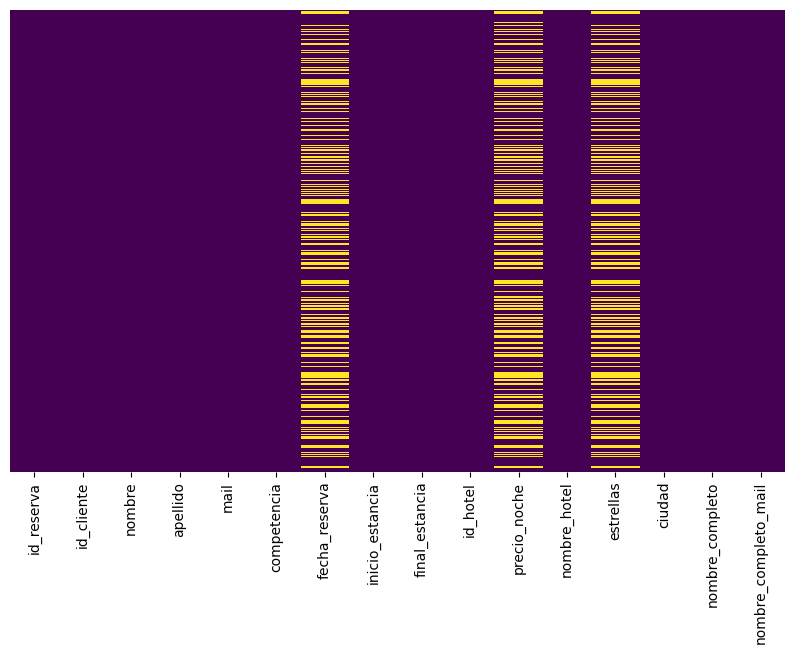

In [55]:
plt.figure(figsize=(10,6))

sns.heatmap(df.isnull(), 
            cmap='viridis', 
            cbar=False, 
            yticklabels=False)


- Vemos que los valores nulos en la fecha_reserva, el precio_noche y las estrellas practicamente igual... Lo que indicaría que son los valores de los hoteles de la competencia de los que no tenemos datos

### DUPLICADOS

In [56]:
df.duplicated().sum()

np.int64(98)

In [57]:
df.drop_duplicates(inplace=True)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id_reserva            15000 non-null  object        
 1   id_cliente            15000 non-null  int64         
 2   nombre                15000 non-null  object        
 3   apellido              15000 non-null  object        
 4   mail                  15000 non-null  object        
 5   competencia           15000 non-null  bool          
 6   fecha_reserva         9828 non-null   datetime64[ns]
 7   inicio_estancia       15000 non-null  datetime64[ns]
 8   final_estancia        15000 non-null  datetime64[ns]
 9   id_hotel              15000 non-null  int64         
 10  precio_noche          9776 non-null   float64       
 11  nombre_hotel          15000 non-null  object        
 12  estrellas             9828 non-null   float64       
 13  ciudad               

In [59]:
df.describe(include="object").T

,count,unique,top,freq
id_reserva,15000,15000,55b1c8de-bc13-4e4c-9dd7-50437788e361,1
nombre,15000,934,Nazaret,41
apellido,15000,1085,Giménez,26
mail,15000,14905,victoriano.ródenas@example.com,3
nombre_hotel,15000,20,,5172
ciudad,15000,1,Madrid,15000
nombre_completo,15000,14905,Victoriano Ródenas,3
nombre_completo_mail,15000,14905,Victoriano Ródenas victoriano.ródenas@example.com,3


- Hemos eliminado los 98 duplicados

In [60]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
id_cliente,15000.0,7455.2706,1.0,3731.75,7455.5,11180.25,14905.0,4303.162973
fecha_reserva,9828,2025-02-06 10:16:50.989010944,2025-02-01 00:00:00,2025-02-03 00:00:00,2025-02-06 00:00:00,2025-02-09 00:00:00,2025-02-12 00:00:00,NaN
inicio_estancia,15000,2025-02-28 23:59:59.999999744,2025-03-01 00:00:00,2025-03-01 00:00:00,2025-03-01 00:00:00,2025-03-01 00:00:00,2025-03-01 00:00:00,NaN
final_estancia,15000,2025-03-02 00:00:00,2025-03-02 00:00:00,2025-03-02 00:00:00,2025-03-02 00:00:00,2025-03-02 00:00:00,2025-03-02 00:00:00,NaN
id_hotel,15000.0,7.547533,1.0,1.0,6.0,13.0,20.0,6.500648
precio_noche,9776.0,275.066498,50.01,163.0625,273.42,387.81,499.82,129.501317
estrellas,9828.0,3.013228,1.0,2.0,3.0,4.0,5.0,1.412063


### Outliers

In [61]:
df["precio_noche"].describe()

count    9776.000000
mean      275.066498
std       129.501317
min        50.010000
25%       163.062500
50%       273.420000
75%       387.810000
max       499.820000
Name: precio_noche, dtype: float64

- El precio representa una cierta uniformidad

<Axes: xlabel='precio_noche', ylabel='Count'>

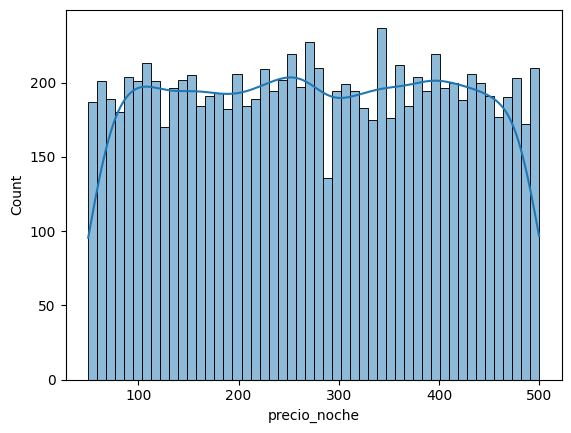

In [62]:
sns.histplot(
    df["precio_noche"], 
    bins=50, 
    kde=True,)


<Axes: xlabel='precio_noche'>

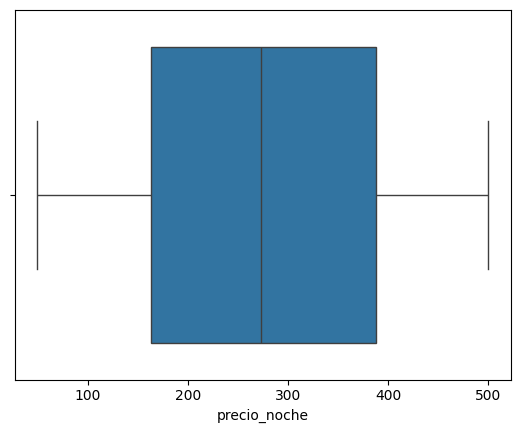

In [63]:
sns.boxplot(x=df["precio_noche"])

- No hay outliers marcados

In [64]:
df["estrellas"].describe()

count    9828.000000
mean        3.013228
std         1.412063
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: estrellas, dtype: float64

<Axes: xlabel='estrellas', ylabel='Count'>

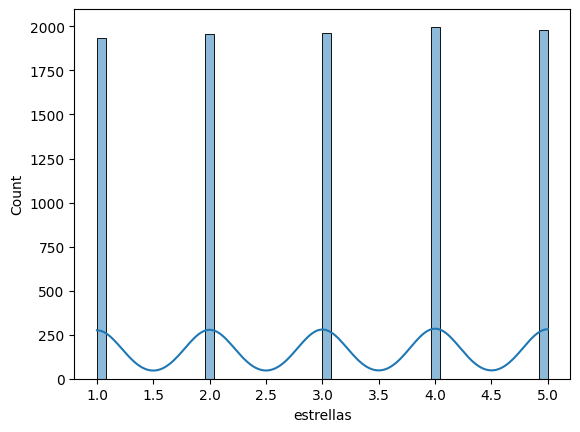

In [65]:
sns.histplot(
    df["estrellas"], 
    bins=50, 
    kde=True,)

<Axes: xlabel='estrellas'>

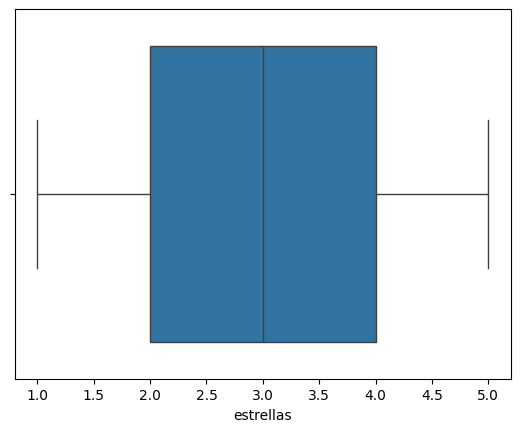

In [66]:
sns.boxplot(x=df["estrellas"])